In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df=pd.read_excel("/Users/hectorrr/proyectos/pruebas prametricas/archivo_varias_hojas_resultados.xlsx", sheet_name="largo_cito")
df

,dosis,tiempo,valor
0,Testigo negativo,0,123
1,Testigo negativo,0,117
2,Testigo negativo,0,113
3,Testigo negativo,0,119
4,Testigo negativo,0,112
...,...,...,...
145,C+ (Doxo),96,108
146,C+ (Doxo),96,84
147,C+ (Doxo),96,120
148,C+ (Doxo),96,105


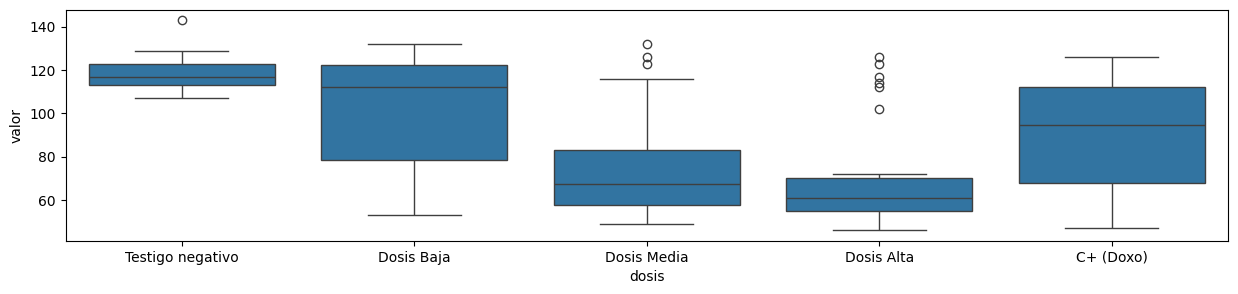

In [4]:
plt.figure(figsize=(15,3))
sns.boxplot(df, x="dosis", y="valor")
plt.show()

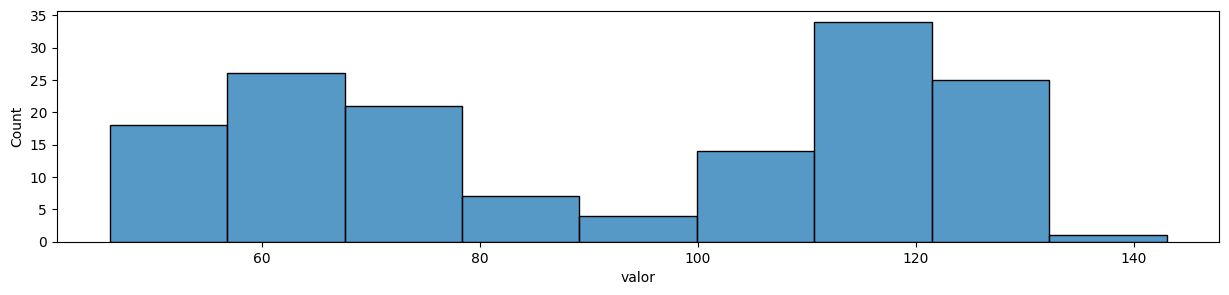

In [5]:
plt.figure(figsize=(15,3))
sns.histplot(df["valor"])
plt.show()

In [6]:
df.describe()

,tiempo,valor
count,150.000000,150.00000
mean,48.000000,91.20000
std,34.054831,28.13677
min,0.000000,46.00000
25%,24.000000,63.00000
50%,48.000000,94.50000
75%,72.000000,117.00000
max,96.000000,143.00000


In [9]:
import numpy as np
def estimacion_boot(arreglo, M=1000, ic=0.95):
    # Inicialización
    n = len(arreglo)   # Tamaño del set de datos
    muestras = np.zeros((M,n)) # Arreglo de Mxn con las muestras
    # Muestreo aleatorio con reemplazo
    for m in range(M):
        muestras[m,:] = np.random.choice(arreglo, size=n, replace=True)  
    # Calcular distribución muestral "bootstrapping" (medias)
    d_muestral_boot = muestras.mean(axis=1)
    
    # Estimar estadística
    media_boot = d_muestral_boot.mean()
    
    # Estimar error estándar
    error_boot = d_muestral_boot.std()
    
    # Estimar intervalo de confianza
    lim_izq = (1-ic)/2 * 100
    lim_der = (ic + (1-ic)/2) * 100
    
    perc_izq = np.percentile(d_muestral_boot, lim_izq)
    perc_der = np.percentile(d_muestral_boot, lim_der)
    # Retornar estadística estimada, error estándar e intervalo de confianza
    return media_boot, error_boot, [perc_izq, perc_der]  

In [7]:
df.dosis.value_counts()

dosis
Testigo negativo    30
Dosis Baja          30
Dosis Media         30
Dosis Alta          30
C+ (Doxo)           30
Name: count, dtype: int64

In [15]:
dosis_1=df[df["dosis"]=="Testigo negativo"]
dosis_2=df[df["dosis"]=="Dosis Baja"]
dosis_3=df[df["dosis"]=="Dosis Media"]
dosis_4=df[df["dosis"]=="Dosis Alta"]
dosis_5=df[df["dosis"]=="C+ (Doxo)"]

estimacion_1, error_1, limites_1=estimacion_boot(dosis_1["valor"], M=100, ic=0.95)
estimacion_2, error_2, limites_2=estimacion_boot(dosis_2["valor"],M=100, ic=0.95)
estimacion_3, error_3, limites_3=estimacion_boot(dosis_3["valor"],M=100, ic=0.95)
estimacion_4, error_4, limites_4=estimacion_boot(dosis_4["valor"],M=100, ic=0.95)
estimacion_5, error_5, limites_5=estimacion_boot(dosis_5["valor"],M=100, ic=0.95)
print(estimacion_1, error_1, limites_1)
print(estimacion_2, error_2, limites_2)
print(estimacion_3, error_3, limites_3)
print(estimacion_4, error_4, limites_4)
print(estimacion_5, error_5, limites_5)


118.32166666666667 1.3305669217793346 [np.float64(115.71583333333334), np.float64(121.38583333333334)]
102.167 4.108185582197788 [np.float64(94.24416666666667), np.float64(109.2525)]
74.91966666666666 4.215904002175044 [np.float64(67.52416666666667), np.float64(83.33416666666665)]
69.80666666666667 4.714464739265506 [np.float64(62.22666666666667), np.float64(79.205)]
90.70533333333331 4.5936059909400155 [np.float64(82.965), np.float64(99.5375)]
